In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras import initializers

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

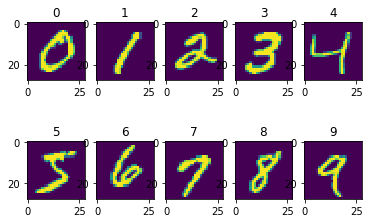

In [5]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    examp = X_train[y_train == i][0]
    plt.imshow(examp)
    plt.title(str(i))

GAN with fully connected neural networks

In [6]:
#Reshaping
X_train = X_train.reshape(60000,28*28).astype('float32')
X_train = (X_train / 255 -0.5)*2
X_train.shape

(60000, 784)

In [7]:
#Generator
latent_space_dim = 100
img_dim = 784

generator = Sequential()

generator.add(Dense(128,input_shape = (latent_space_dim,) , kernel_initializer = initializers.RandomNormal(stddev = 0.02)))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum = 0.8))

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum = 0.8))

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum = 0.8))

generator.add(Dense(img_dim,activation = 'tanh'))

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [8]:
 discriminator = Sequential()

discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=initializers.RandomNormal(stddev = 0.02)))
discriminator.add(LeakyReLU(alpha=0.2))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

discriminator.add(Dense(1, activation='sigmoid'))
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [9]:
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [10]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
d_g.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 784)               315792    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 265601    
Total params: 581,393
Trainable params: 314,512
Non-trainable params: 266,881
_________________________________________________________________


epoch = 1/100, d_loss=0.607, g_loss=2.938                                                                                                                      


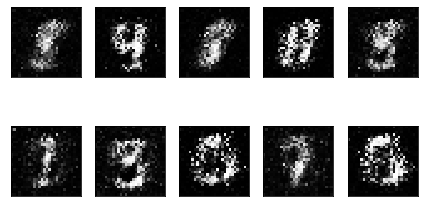

epoch = 2/100, d_loss=0.606, g_loss=1.815                                                                                                                      
epoch = 3/100, d_loss=0.542, g_loss=1.910                                                                                                                      
epoch = 4/100, d_loss=0.579, g_loss=1.737                                                                                                                      
epoch = 5/100, d_loss=0.553, g_loss=1.664                                                                                                                      
epoch = 6/100, d_loss=0.586, g_loss=1.590                                                                                                                      
epoch = 7/100, d_loss=0.481, g_loss=1.487                                                                                                                      
epoch = 8/100, d_loss=0.526, g_loss=1.38

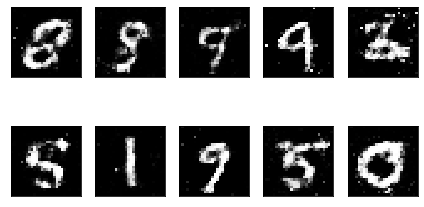

epoch = 12/100, d_loss=0.567, g_loss=1.265                                                                                                                      
epoch = 13/100, d_loss=0.515, g_loss=1.270                                                                                                                      
epoch = 14/100, d_loss=0.544, g_loss=1.253                                                                                                                      
epoch = 15/100, d_loss=0.606, g_loss=1.290                                                                                                                      
epoch = 16/100, d_loss=0.531, g_loss=1.306                                                                                                                      
epoch = 17/100, d_loss=0.529, g_loss=1.482                                                                                                                      
epoch = 18/100, d_loss=0.514, g_lo

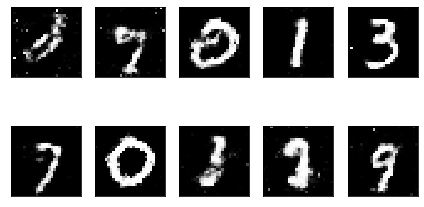

epoch = 22/100, d_loss=0.588, g_loss=1.271                                                                                                                      
epoch = 23/100, d_loss=0.542, g_loss=1.338                                                                                                                      
epoch = 24/100, d_loss=0.537, g_loss=1.327                                                                                                                      
epoch = 25/100, d_loss=0.512, g_loss=1.336                                                                                                                      
epoch = 26/100, d_loss=0.571, g_loss=1.348                                                                                                                      
epoch = 27/100, d_loss=0.522, g_loss=1.320                                                                                                                      
epoch = 28/100, d_loss=0.508, g_lo

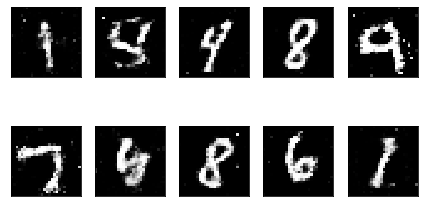

epoch = 32/100, d_loss=0.519, g_loss=1.485                                                                                                                      
epoch = 33/100, d_loss=0.549, g_loss=1.398                                                                                                                      
epoch = 34/100, d_loss=0.484, g_loss=1.466                                                                                                                      
epoch = 35/100, d_loss=0.507, g_loss=1.287                                                                                                                      
epoch = 36/100, d_loss=0.592, g_loss=1.325                                                                                                                      
epoch = 37/100, d_loss=0.522, g_loss=1.273                                                                                                                      
epoch = 38/100, d_loss=0.509, g_lo

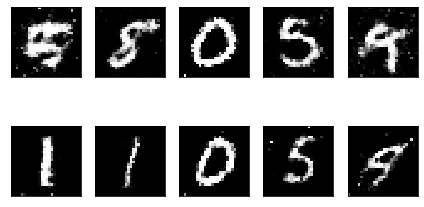

epoch = 42/100, d_loss=0.546, g_loss=1.358                                                                                                                      
epoch = 43/100, d_loss=0.486, g_loss=1.503                                                                                                                      
epoch = 44/100, d_loss=0.512, g_loss=1.620                                                                                                                      
epoch = 45/100, d_loss=0.452, g_loss=1.531                                                                                                                      
epoch = 46/100, d_loss=0.510, g_loss=1.536                                                                                                                      
epoch = 47/100, d_loss=0.571, g_loss=1.588                                                                                                                      
epoch = 48/100, d_loss=0.507, g_lo

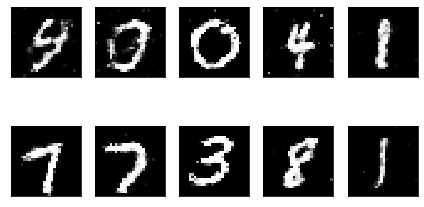

epoch = 52/100, d_loss=0.490, g_loss=1.432                                                                                                                      
epoch = 53/100, d_loss=0.517, g_loss=1.378                                                                                                                      
epoch = 54/100, d_loss=0.463, g_loss=1.659                                                                                                                      
epoch = 55/100, d_loss=0.517, g_loss=1.380                                                                                                                      
epoch = 56/100, d_loss=0.535, g_loss=1.457                                                                                                                      
epoch = 57/100, d_loss=0.449, g_loss=1.741                                                                                                                      
epoch = 58/100, d_loss=0.531, g_lo

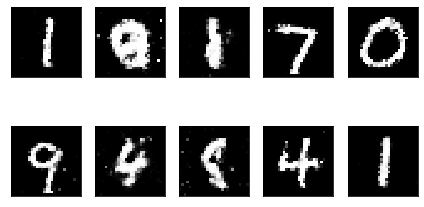

epoch = 62/100, d_loss=0.454, g_loss=1.565                                                                                                                      
epoch = 63/100, d_loss=0.499, g_loss=1.554                                                                                                                      
epoch = 64/100, d_loss=0.453, g_loss=1.683                                                                                                                      
epoch = 65/100, d_loss=0.482, g_loss=1.634                                                                                                                      
epoch = 66/100, d_loss=0.490, g_loss=1.513                                                                                                                      
epoch = 67/100, d_loss=0.522, g_loss=1.438                                                                                                                      
epoch = 68/100, d_loss=0.442, g_lo

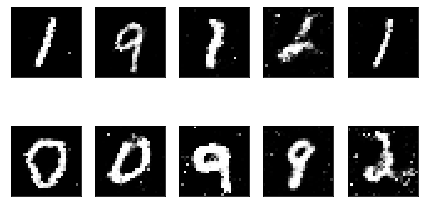

epoch = 72/100, d_loss=0.514, g_loss=1.522                                                                                                                      
epoch = 73/100, d_loss=0.482, g_loss=1.583                                                                                                                      
epoch = 74/100, d_loss=0.501, g_loss=1.601                                                                                                                      
epoch = 75/100, d_loss=0.457, g_loss=1.573                                                                                                                      
epoch = 76/100, d_loss=0.497, g_loss=1.506                                                                                                                      
epoch = 77/100, d_loss=0.475, g_loss=1.522                                                                                                                      
epoch = 78/100, d_loss=0.474, g_lo

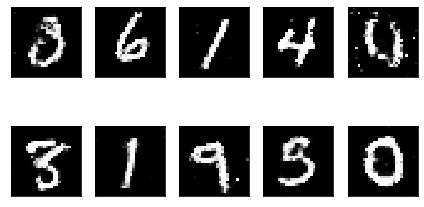

epoch = 82/100, d_loss=0.511, g_loss=1.621                                                                                                                      
epoch = 83/100, d_loss=0.466, g_loss=1.668                                                                                                                      
epoch = 84/100, d_loss=0.437, g_loss=1.850                                                                                                                      
epoch = 85/100, d_loss=0.487, g_loss=1.679                                                                                                                      
epoch = 86/100, d_loss=0.488, g_loss=1.565                                                                                                                      
epoch = 87/100, d_loss=0.484, g_loss=1.573                                                                                                                      
epoch = 88/100, d_loss=0.451, g_lo

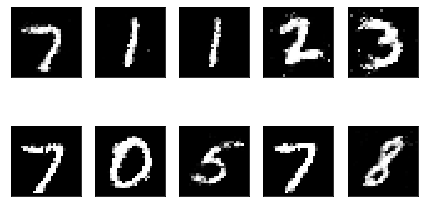

epoch = 92/100, d_loss=0.443, g_loss=1.865                                                                                                                      
epoch = 93/100, d_loss=0.455, g_loss=1.599                                                                                                                      
epoch = 94/100, d_loss=0.514, g_loss=1.778                                                                                                                      
epoch = 95/100, d_loss=0.458, g_loss=1.743                                                                                                                      
epoch = 96/100, d_loss=0.457, g_loss=1.726                                                                                                                                                                                                                          
epoch = 97/100, d_loss=0.463, g_loss=1.613                                                     

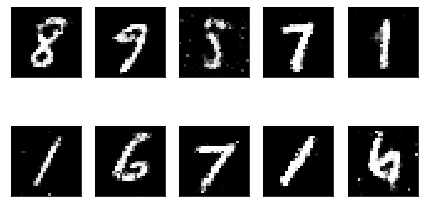

In [14]:

epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        #train discriminator
        discriminator.trainable = True
        
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_space_dim))
        X_fake = generator.predict_on_batch(z)
        
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
        
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        
        #train generator
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
        
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_space_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()
        

In [15]:
generator.save("model/generator.h5")

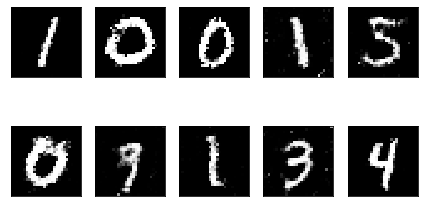

In [24]:
model = load_model("model/generator.h5")
x_fake = model.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_space_dim)))

for k in range(samples):
    plt.subplot(2, 5, k+1)
    plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

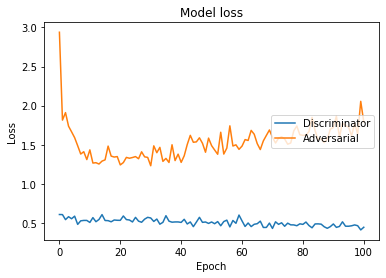

In [25]:
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()